In [1]:
library("tidyverse")
library("tidymodels")
library("readr")
library("skimr")
library("moderndive")
library("ISLR")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
evals_ch6 <- evals |> select(ID, score, age, gender)

evals_ch6 |> glimpse()

Rows: 463
Columns: 4
$ ID     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, …
$ score  <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8, 4.5, 4.6…
$ age    <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40, 40, 40,…
$ gender <fct> female, female, female, female, male, male, male, male, male, f…


In [5]:
evals_ch6 |> sample_n(8)

ID,score,age,gender
<int>,<dbl>,<int>,<fct>
58,4.7,47,male
270,4.6,33,female
394,4.8,45,male
89,4.4,56,female
20,4.6,31,female
372,4.4,38,male
276,4.6,38,female
341,4.9,43,male


In [6]:
evals_ch6 |> select(score, age, gender) |> skim()

── Data Summary ────────────────────────
                           Values                      
Name                       select(evals_ch6, score, ...
Number of rows             463                         
Number of columns          3                           
_______________________                                
Column type frequency:                                 
  factor                   1                           
  numeric                  2                           
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 gender                0             1 FALSE          2 mal: 268, fem: 195

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd   p0  p25  p50  p75 p100
1 scor

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


In [20]:
evals_ch6 |> filter(gender == "female") |> get_correlation(formula = score ~ age)

cor
<dbl>
-0.2651758


In [22]:
evals_ch6 |> filter(gender == "male") |> get_correlation(formula = score ~ age)

cor
<dbl>
-0.07645422


In [23]:
evals_ch6 |> get_correlation(formula = score ~ age)

cor
<dbl>
-0.107032


`geom_smooth()` using formula = 'y ~ x'


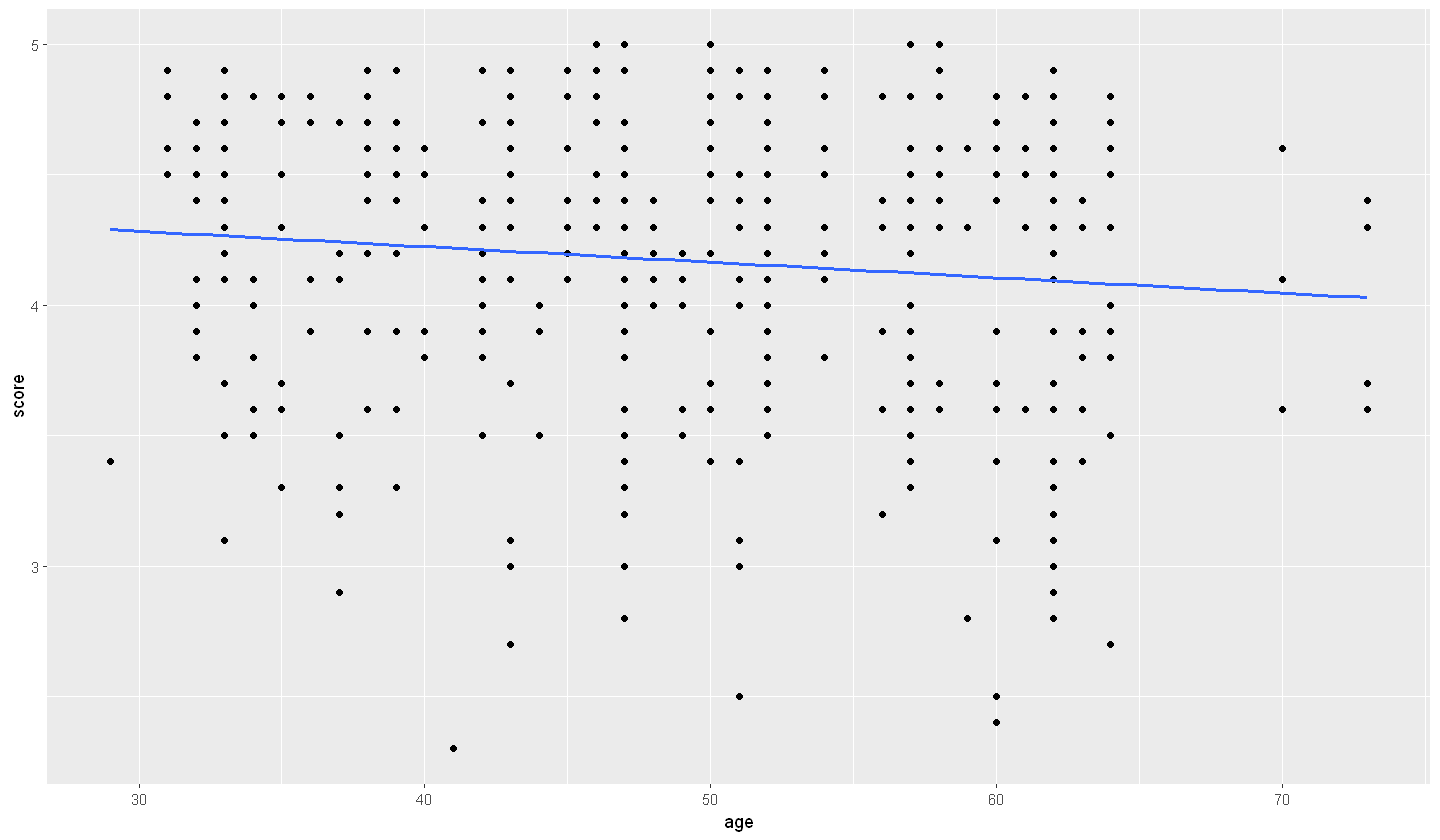

In [26]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(evals_ch6, aes(x = age, y = score)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


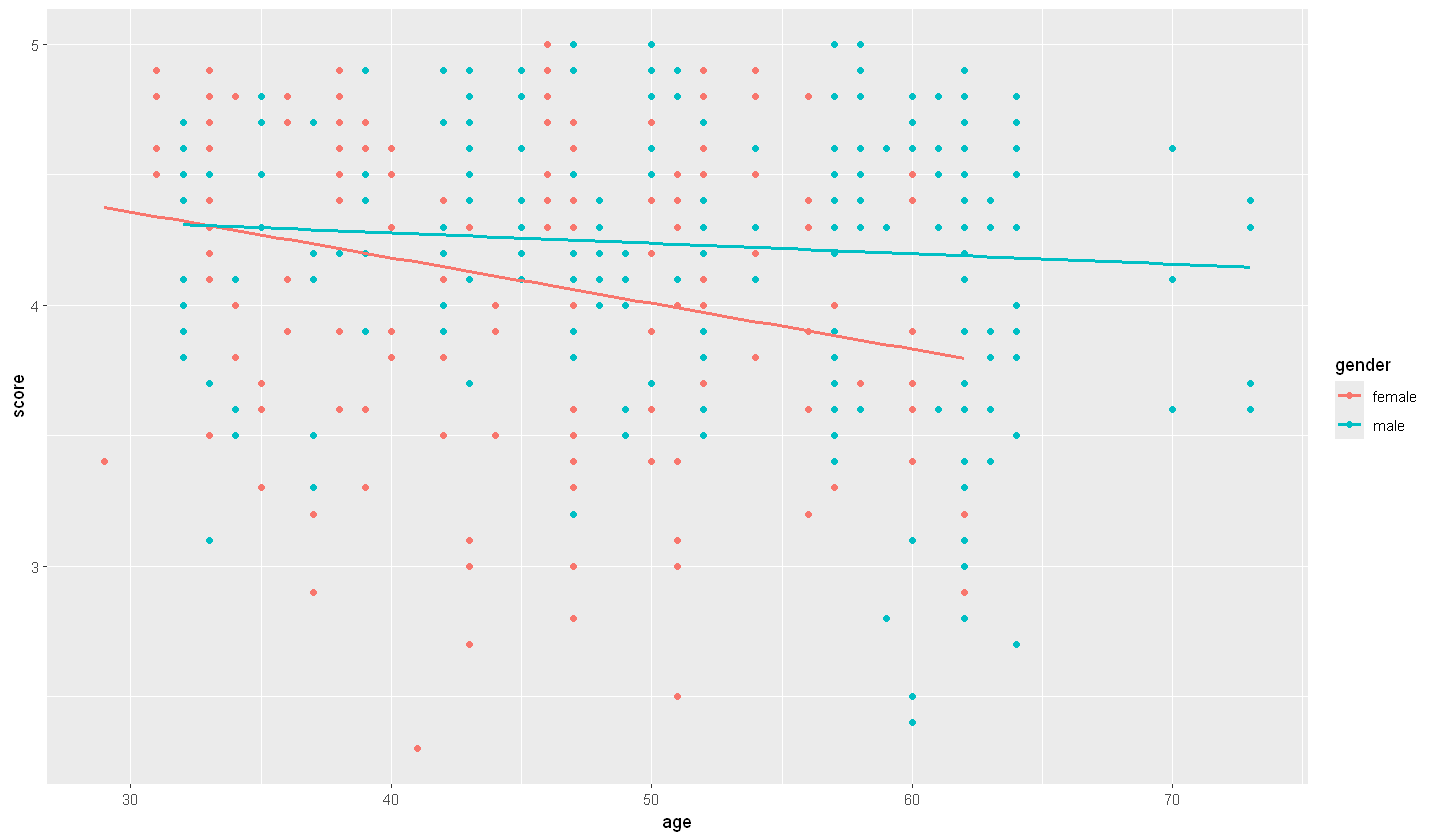

In [27]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(evals_ch6, aes(x = age, y = score, color = gender)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)